In [16]:
from __future__ import print_function
import findspark
findspark.init()
from pyspark.sql import SparkSession, SQLContext, Row
import seaborn as sns
from pyspark.sql.functions import col, mean, monotonically_increasing_id, floor
from pyspark.sql.types import StructType,StructField, StringType
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier, GBTClassifier, NaiveBayes, LinearSVC
from pyspark.ml.feature import IndexToString,StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

8187 525
2726 178
2738 166
2723 181
+---------+--------------+-----+------+--------------------+---------+
|signal_id|id_measurement|phase|target|            features|signal_id|
+---------+--------------+-----+------+--------------------+---------+
|        0|             0|    0|     0|[10.809125,0.5727...|        0|
|        1|             0|    1|     0|[6.6541875,15.337...|        1|
|        2|             0|    2|     0|[-18.8354625,-17....|        2|
|        3|             1|    0|     1|[-9.6913125,1.001...|        3|
|        4|             1|    1|     1|[-9.7676625,-16.9...|        4|
|        5|             1|    2|     1|[18.48585,15.1597...|        5|
|        6|             2|    0|     0|[-19.958425,-19.1...|        6|
|        7|             2|    1|     0|[12.9744125,2.229...|        7|
|        8|             2|    2|     0|[6.595825,16.1692...|        8|
|        9|             3|    0|     0|[-8.734875,5.6185...|        9|
|       10|             3|    1|     0|[-

Py4JJavaError: An error occurred while calling o8937.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 183.0 failed 1 times, most recent failure: Lost task 0.0 in stage 183.0 (TID 358) (USC-W-91BW1X2.ams.com executor driver): org.apache.spark.SparkException: Failed to execute user defined function(NaiveBayes$$Lambda$4544/1283104823: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.eval(ScalaUDF.scala:1193)
	at org.apache.spark.ml.stat.SummaryBuilderImpl$MetricsAggregate.update(Summarizer.scala:374)
	at org.apache.spark.ml.stat.SummaryBuilderImpl$MetricsAggregate.update(Summarizer.scala:344)
	at org.apache.spark.sql.catalyst.expressions.aggregate.TypedImperativeAggregate.update(interfaces.scala:562)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator$$anonfun$1.$anonfun$applyOrElse$2(AggregationIterator.scala:196)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator$$anonfun$1.$anonfun$applyOrElse$2$adapted(AggregationIterator.scala:196)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateProcessRow$7(AggregationIterator.scala:213)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateProcessRow$7$adapted(AggregationIterator.scala:207)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:158)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:77)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2(ObjectHashAggregateExec.scala:107)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2$adapted(ObjectHashAggregateExec.scala:85)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:885)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:885)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.lang.IllegalArgumentException: requirement failed: Naive Bayes requires nonnegative feature values but found [-18.8354625,-17.508525,-7.59025,3.3261625,12.7348125,18.43355,17.6959625,7.537125,-3.4242,-12.804725].
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.classification.NaiveBayes$.requireNonnegativeValues(NaiveBayes.scala:358)
	at org.apache.spark.ml.classification.NaiveBayes.$anonfun$trainDiscreteImpl$1(NaiveBayes.scala:177)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$f$2(ScalaUDF.scala:205)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.eval(ScalaUDF.scala:1190)
	... 29 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2258)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2207)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2206)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1079)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1079)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2445)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2387)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2376)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:868)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2196)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2217)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2261)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:3696)
	at org.apache.spark.sql.Dataset.$anonfun$collect$1(Dataset.scala:2965)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3687)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3685)
	at org.apache.spark.sql.Dataset.collect(Dataset.scala:2965)
	at org.apache.spark.ml.classification.NaiveBayes.trainDiscreteImpl(NaiveBayes.scala:193)
	at org.apache.spark.ml.classification.NaiveBayes.$anonfun$trainWithLabelCheck$1(NaiveBayes.scala:160)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.NaiveBayes.trainWithLabelCheck(NaiveBayes.scala:144)
	at org.apache.spark.ml.classification.NaiveBayes.train(NaiveBayes.scala:133)
	at org.apache.spark.ml.classification.NaiveBayes.train(NaiveBayes.scala:95)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:151)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:115)
	at sun.reflect.GeneratedMethodAccessor223.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.SparkException: Failed to execute user defined function(NaiveBayes$$Lambda$4544/1283104823: (struct<type:tinyint,size:int,indices:array<int>,values:array<double>>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.eval(ScalaUDF.scala:1193)
	at org.apache.spark.ml.stat.SummaryBuilderImpl$MetricsAggregate.update(Summarizer.scala:374)
	at org.apache.spark.ml.stat.SummaryBuilderImpl$MetricsAggregate.update(Summarizer.scala:344)
	at org.apache.spark.sql.catalyst.expressions.aggregate.TypedImperativeAggregate.update(interfaces.scala:562)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator$$anonfun$1.$anonfun$applyOrElse$2(AggregationIterator.scala:196)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator$$anonfun$1.$anonfun$applyOrElse$2$adapted(AggregationIterator.scala:196)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateProcessRow$7(AggregationIterator.scala:213)
	at org.apache.spark.sql.execution.aggregate.AggregationIterator.$anonfun$generateProcessRow$7$adapted(AggregationIterator.scala:207)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.processInputs(ObjectAggregationIterator.scala:158)
	at org.apache.spark.sql.execution.aggregate.ObjectAggregationIterator.<init>(ObjectAggregationIterator.scala:77)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2(ObjectHashAggregateExec.scala:107)
	at org.apache.spark.sql.execution.aggregate.ObjectHashAggregateExec.$anonfun$doExecute$2$adapted(ObjectHashAggregateExec.scala:85)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2(RDD.scala:885)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsWithIndexInternal$2$adapted(RDD.scala:885)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:497)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1439)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:500)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more
Caused by: java.lang.IllegalArgumentException: requirement failed: Naive Bayes requires nonnegative feature values but found [-18.8354625,-17.508525,-7.59025,3.3261625,12.7348125,18.43355,17.6959625,7.537125,-3.4242,-12.804725].
	at scala.Predef$.require(Predef.scala:281)
	at org.apache.spark.ml.classification.NaiveBayes$.requireNonnegativeValues(NaiveBayes.scala:358)
	at org.apache.spark.ml.classification.NaiveBayes.$anonfun$trainDiscreteImpl$1(NaiveBayes.scala:177)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.$anonfun$f$2(ScalaUDF.scala:205)
	at org.apache.spark.sql.catalyst.expressions.ScalaUDF.eval(ScalaUDF.scala:1190)
	... 29 more


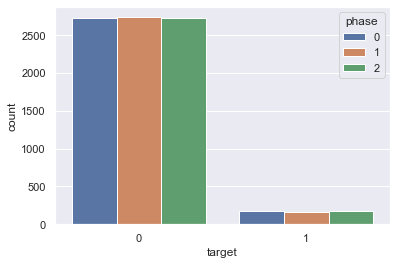

In [19]:
if __name__ == "__main__":

    # Create a SparkSession (Note, the config section is only for Windows!)
    spark = SparkSession.builder.master('local[*]').config('spark.executor.memory', '12g').config('spark.driver.memory', '12g').config('spark.driver.maxResultSize', '12g').config("spark.cores.max", "6").appName("FaultDetection").getOrCreate()
    #spark = SparkSession.builder.appName("RecommenderSystem").getOrCreate()
    
    # Load up data as dataframe
    data = spark.read.option("header", "true").option("inferSchema", "true").csv("C:/My_Data/MS/CS657/Project/InputData/metadata_train.csv")
    data.limit(500)
    
    signalData = spark.read.option("header", "true").option("inferSchema", "true").parquet("C:/My_Data/MS/CS657/Project/InputData/train.parquet")
    #signalData = signalData.limit(500)
    #signalData.show(20)
    
    ################################# Visualization of train data ###################################################
    
    notFaulty = data.select('signal_id').where(data.target == 0).count()
    faulty = data.select('signal_id').where(data.target == 1).count()
    
    # 8187 -  signals are not faulty, while 525 are faulty
    print(notFaulty, faulty)
    
    # phase wise distribution of faulty vs not faulty signals
    notFaultyPhase0 = data.select('signal_id').where((data.target == 0) & (data.phase == 0)).count()
    faultyPhase0 = data.select('signal_id').where((data.target == 1) & (data.phase == 0)).count()
    print(notFaultyPhase0, faultyPhase0)
    
    notFaultyPhase1 = data.select('signal_id').where((data.target == 0) & (data.phase == 1)).count()
    faultyPhase1 = data.select('signal_id').where((data.target == 1) & (data.phase == 1)).count()
    print(notFaultyPhase1, faultyPhase1)
    
    notFaultyPhase2 = data.select('signal_id').where((data.target == 0) & (data.phase == 2)).count()
    faultyPhase2 = data.select('signal_id').where((data.target == 1) & (data.phase == 2)).count()
    print(notFaultyPhase2, faultyPhase2)
    
    
    meta_data =  data.toPandas()
    sns.set(style="darkgrid")
    sns.countplot(x = 'target',hue = 'phase',data = meta_data)
    
    #################################################################################################################
    
    
    ################################# Feature Extraction ############################################################

#     signalData = signalData.select(signalData.columns[:500])
    
#     signalData = signalData.withColumn("index", monotonically_increasing_id())
#     #signalData.limit(80000)
    
#     indexes = signalData.select(col("index"))
    
#     if (indexes.tail(1)[0]['index']-indexes.head()['index'] != 799999):
#         print("ID assign error")
#         spark.stop()
#         exit()
       
#     n_aggregate_columns = 80000
    
#     signalData = signalData.withColumn('index', signalData['index']-indexes.head()['index'])
#     #signalData.show(5)
    
#     signalData = signalData.withColumn('index', floor(signalData['index']/n_aggregate_columns)).groupBy('index').avg().orderBy('index')
#     signalData.show()
#     print((signalData.count(), len(signalData.columns)))
#     signalData =  signalData.drop(col("avg(index)"))
#     signalDataWithFeatures = spark.createDataFrame(signalData.toPandas().set_index("index").transpose())
#     signalDataWithFeatures.show()
    
#     assembler = VectorAssembler(inputCols=[x for x in signalDataWithFeatures.columns],outputCol="features")

#     features = assembler.transform(signalDataWithFeatures)
#     features = features.select("features")
    
#     features = features.withColumn("signal_id", monotonically_increasing_id())
#     indexes = features.select(col("signal_id"))
    
#     features = features.withColumn('signal_id', features['signal_id']-indexes.head()['signal_id'])
#     features.show()
#     features.write.parquet("C:/My_Data/MS/CS657/Project/InputData/features.parquet")
    #################################################################################################################
    
    ################################# Decision Tree Classifier #######################################################
    
    featureData = spark.read.option("header", "true").option("inferSchema", "true").parquet("C:/My_Data/MS/CS657/Project/InputData/features.parquet")
    finalData = data.join(featureData,data.signal_id ==  featureData.signal_id,"inner")
    finalData.show()
    
    # Index labels, adding metadata to the label column.
    # Fit on whole dataset to include all labels in index.
    labelIndexer = StringIndexer(inputCol="target", outputCol="indexedLabel").fit(finalData)
    # Automatically identify categorical features, and index them.
    # We specify maxCategories so features with > 4 distinct values are treated as continuous.
    featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(finalData)

    # Split the data into training and test sets (30% held out for testing)
    (trainingData, testData) = finalData.randomSplit([0.7, 0.3])

    # Train a DecisionTree model.
    dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

    # Chain indexers and tree in a Pipeline
    pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

    # Train model.  This also runs the indexers.
    model = pipeline.fit(trainingData)

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("prediction", "indexedLabel", "features").show(5)

    # Select (prediction, true label) and compute test error
    evaluator = MulticlassClassificationEvaluator(
        labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(accuracy)
    print("Test Error = %g " % (1.0 - accuracy))
    
    
    #################################################################################################################
    
    ################################# Random Forest Classifier #######################################################
    
    # Train a RandomForest model.
    rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

    # Convert indexed labels back to original labels.
    labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                                   labels=labelIndexer.labels)

    # Chain indexers and forest in a Pipeline
    pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

    # Train model.  This also runs the indexers.
    model = pipeline.fit(trainingData)

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("predictedLabel", "target", "features").show(5)

    # Select (prediction, true label) and compute test error
    evaluator = MulticlassClassificationEvaluator(
        labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(accuracy)
    print("Test Error = %g" % (1.0 - accuracy))
    
    
    #################################################################################################################
    
    ################################# Gradient-boosted tree Classifier #######################################################
    
    # Train a GBT model.
    gbt = GBTClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", maxIter=10)

    # Chain indexers and GBT in a Pipeline
    pipeline = Pipeline(stages=[labelIndexer, featureIndexer, gbt])

    # Train model.  This also runs the indexers.
    model = pipeline.fit(trainingData)

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    predictions.select("prediction", "indexedLabel", "features").show(5)

    # Select (prediction, true label) and compute test error
    evaluator = MulticlassClassificationEvaluator(
        labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)
    print(accuracy)
    print("Test Error = %g" % (1.0 - accuracy))
    
    
    #################################################################################################################
    
    ################################# Linear SVM Classifier ###############################################
    
    lsvc = LinearSVC(maxIter=10, regParam=0.1, labelCol="target")
    
    # Fit the model
    lsvcModel = lsvc.fit(trainingData)
    # Compute predictions for test data
    predictions = lsvcModel.transform(testData)

    # Show the computed predictions and compare with the original labels
    predictions.select("features", "target", "prediction").show(10)

    # Define the evaluator method with the corresponding metric and compute the classification error on test data
    evaluator = MulticlassClassificationEvaluator(labelCol="target").setMetricName('accuracy')
    accuracy = evaluator.evaluate(predictions) 

    # Show the accuracy
    print("Test accuracy = %g" % (accuracy))
    
    
    #################################################################################################################
    
    
    spark.stop()